In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/'

import sys, os
sys.path.append(prj_dir + 'src/')
import _config, _lib

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


## interpolate

In [9]:
fs = [
    2,
    1,
]

start_fqs = [
    0.5,
    0.5,
]
all_fqs = [start_fqs]

for t in range(2):
    fqs = all_fqs[-1]
    mf = np.dot(fs, fqs)
    changes = fs / mf
    new_fqs = changes * fqs
    all_fqs.append(new_fqs)
    
print(all_fqs)

[[0.5, 0.5], array([0.66666667, 0.33333333]), array([0.8, 0.2])]


In [51]:
t_res = 10

adj_fs = [f**(1/t_res) for f in fs]

interpolated_all_fqs = [start_fqs]

for t in range(t_res):
    fqs = interpolated_all_fqs[-1]
    mf = np.dot(adj_fs, fqs)
    changes = adj_fs / mf
    new_fqs = changes * fqs
    interpolated_all_fqs.append(list(new_fqs))
    
print(interpolated_all_fqs)

[[0.5, 0.5], [0.5173217448321853, 0.48267825516781476], [0.5346019613807635, 0.46539803861923645], [0.5517995186601091, 0.4482004813398909], [0.5688740722307839, 0.431125927769216], [0.585786437626905, 0.4142135623730951], [0.6024989407343607, 0.39750105926563917], [0.6189757386701197, 0.3810242613298804], [0.6351831056874557, 0.3648168943125442], [0.6510896797541331, 0.3489103202458669], [0.6666666666666666, 0.3333333333333334]]


## Confirm non-smoothness

In [10]:
# Make slightly different

all_fqs = [
    [0.5, 0.5],
    [2/3, 1/3],
    [0.75, 0.25],
]

In [11]:
def calc_fitness(p1, p2):
    return [s2/s1 for s1, s2 in zip(p1, p2)]

calc_fitness([0.5, 0.5], [2/3, 1/3])

[1.3333333333333333, 0.6666666666666666]

In [12]:
calc_fitness([2/3, 1/3], [0.75,  0.25])

[1.125, 0.75]

In [52]:
t_res = 10

new_fs = calc_fitness([2/3, 1/3], [0.75,  0.25])
adj_fs = [f**(1/t_res) for f in new_fs]

for t in range(t_res):
    fqs = interpolated_all_fqs[-1]
    mf = np.dot(adj_fs, fqs)
    changes = adj_fs / mf
    new_fqs = changes * fqs
    interpolated_all_fqs.append(list(new_fqs))
    
print(interpolated_all_fqs)

[[0.5, 0.5], [0.5173217448321853, 0.48267825516781476], [0.5346019613807635, 0.46539803861923645], [0.5517995186601091, 0.4482004813398909], [0.5688740722307839, 0.431125927769216], [0.585786437626905, 0.4142135623730951], [0.6024989407343607, 0.39750105926563917], [0.6189757386701197, 0.3810242613298804], [0.6351831056874557, 0.3648168943125442], [0.6510896797541331, 0.3489103202458669], [0.6666666666666666, 0.3333333333333334], [0.6756153037894976, 0.3243846962105025], [0.6844374200355421, 0.31556257996445797], [0.6931285847603696, 0.30687141523963046], [0.7016847098015395, 0.2983152901984605], [0.7101020514433644, 0.2898979485566356], [0.7183772107325528, 0.2816227892674473], [0.7265071322151069, 0.27349286778489307], [0.7344891011745941, 0.26551089882540585], [0.7423207394602197, 0.25767926053978013], [0.7500000000000001, 0.25]]


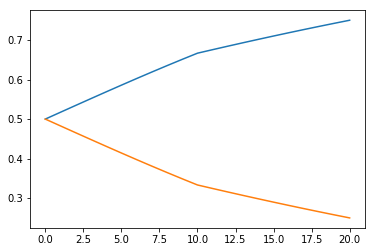

In [56]:
plt.plot(
    range(len(interpolated_all_fqs)),
    np.array(interpolated_all_fqs).T[0],
)

plt.plot(
    range(len(interpolated_all_fqs)),
    np.array(interpolated_all_fqs).T[1],
)

## Compare to linear interpolation

In [65]:
step = (2/3 - 0.5)/10
linear_interpolated_fqs = list(np.arange(0.5, 2/3 + step - 0.01, step ))

step = (0.75 - 2/3)/10
linear_interpolated_fqs += list(np.arange(2/3 + step, 0.75 + step, step ))

print(linear_interpolated_fqs)

[0.5, 0.5166666666666666, 0.5333333333333332, 0.5499999999999998, 0.5666666666666664, 0.583333333333333, 0.5999999999999996, 0.6166666666666663, 0.6333333333333329, 0.6499999999999995, 0.6666666666666661, 0.6749999999999999, 0.6833333333333332, 0.6916666666666665, 0.6999999999999998, 0.7083333333333331, 0.7166666666666665, 0.7249999999999998, 0.7333333333333331, 0.7416666666666664, 0.7499999999999997]


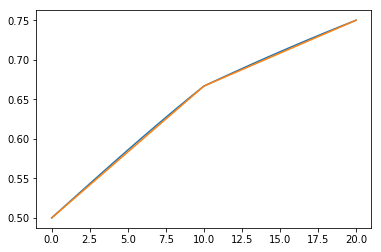

In [67]:
plt.plot(
    range(len(interpolated_all_fqs)),
    np.array(interpolated_all_fqs).T[0],
)

plt.plot(
    range(len(interpolated_all_fqs)),
    linear_interpolated_fqs,
)